In [69]:
import igraph
import copy
import networkx as nx
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
import os
import glob

import matplotlib.patches as mpatches
import matplotlib.lines as mlines
%matplotlib inline

#why need download?
#3m resolution

#1. copublish use Ox' license 
#2. slider
#recurring problem - needs to look at construction sites
#
# Green info - little engine for 
# can we find another source?
# 

In [70]:
""" get all files """
files = glob.glob('./matrix_csvs/*')

g_MW_files = sorted([f for f in files if ((f.split('/')[-1].split('_')[1]=='green')and (f.split('/')[-1].split('_')[2]=='MW.csv') ) ])
b_MW_files =sorted([f for f in files if ((f.split('/')[-1].split('_')[1]=='blue') and (f.split('/')[-1].split('_')[2]=='MW.csv') )])
all_MW_files = sorted([f for f in files if ((f.split('/')[-1].split('_')[1]=='all') and (f.split('/')[-1].split('_')[2]=='MW.csv'))])

print all_MW_files

['./matrix_csvs/2004.75_all_MW.csv', './matrix_csvs/2007.75_all_MW.csv', './matrix_csvs/2008.75_all_MW.csv', './matrix_csvs/2009.75_all_MW.csv', './matrix_csvs/2010.75_all_MW.csv', './matrix_csvs/2011.5_all_MW.csv', './matrix_csvs/2012.75_all_MW.csv', './matrix_csvs/2013.75_all_MW.csv', './matrix_csvs/2014.75_all_MW.csv', './matrix_csvs/2015.0_all_MW.csv', './matrix_csvs/2015.25_all_MW.csv', './matrix_csvs/2015.5_all_MW.csv', './matrix_csvs/2015.75_all_MW.csv', './matrix_csvs/2016.0_all_MW.csv', './matrix_csvs/2016.25_all_MW.csv', './matrix_csvs/2016.5_all_MW.csv', './matrix_csvs/2016.75_all_MW.csv', './matrix_csvs/2017.0_all_MW.csv', './matrix_csvs/2017.25_all_MW.csv', './matrix_csvs/2017.5_all_MW.csv', './matrix_csvs/2017.75_all_MW.csv']


In [71]:

""" get a dict going with files and data """
data = {}
years = range(2007,2018)
years_m = [2007,2008,2009,2010,2012,2013,2014,2015,2016,2017]
for y in years_m:
    fname_all = [f for f in all_MW_files if ((str(y)+'.75') in f)][0]
    fname_g = [f for f in g_MW_files if ((str(y)+'.75') in f)][0]
    fname_b = [f for f in b_MW_files if ((str(y)+'.75') in f)][0]
    data[y]={'year':y,
             'fname_all':fname_all,
             'data_all':0.0,
             'fname_g':fname_g,
             'data_g':0.0,
             'fname_b':fname_b,
             'data_b':0.0}
    
data[2011]={'data_b': 0.0,
            'data_g': 0.0,
            'year': 2011,
            'fname_g': './matrix_csvs/2011.5_green_MW.csv',
            'fname_b': './matrix_csvs/2011.5_blue_MW.csv',
            'data_all': 0.0,
            'fname_all': './matrix_csvs/2011.5_all_MW.csv'}
    
print data[2016]['data_all']

0.0


In [72]:
""" read in all the data """
for y in years:
    print y
    data[y]['data_all']=pd.read_csv(data[y]['fname_all'], encoding='utf-8').set_index('COMPANY')
    data[y]['data_g']=pd.read_csv(data[y]['fname_g'], encoding='utf-8').set_index('COMPANY')
    data[y]['data_b']=pd.read_csv(data[y]['fname_b'], encoding='utf-8').set_index('COMPANY')
    data[y]['data_ff'] = data[y]['data_all'].subtract(data[y]['data_g'], fill_value=0.0).subtract(data[y]['data_b'], fill_value=0.0)

2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


In [73]:
print data[y]['data_g'][data[y]['data_g']>0.0]

                                UA  CZ  HR  BG  CU  AU  AR  BR  SV  TH  ...   \
COMPANY                                                                 ...    
ELECTRICITE DE FRANCE SA (EDF) NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...    
CHINA GUODIAN CORP             NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...    
HUANENG POWER INTERNATIONAL    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...    
SAUDI ELECTRICITY CO           NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...    
TOKYO ELECTRIC POWER CO        NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...    
NRG ENERGY INC                 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...    
ESKOM                          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...    
DATANG INTL POWER GEN CO       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...    
COMISION FEDERAL DE ELEC       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...    
CHINA RESOURCES POWER HOLDINGS NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...    
NTPC LTD                       NaN NaN N

In [74]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)
def degree(x):
    #print x
    #print 'softmax: ', softmax(x)
    #raw_input('-->')
    return np.sum(softmax(x)/np.max(x))/x.shape[0]

In [75]:
""" get dregree for all data"""

for y in years:
    print y
    for data_str in ['data_all','data_g','data_b', 'data_ff']:
        df = data[y][data_str]
        #degree just with connections
        df['degree'] = df[df>0].count(axis=1)
    
        #degree with algo
        #df['degree'] = df.apply(lambda row: degree(row/np.sum(row)), axis=1)
    

        cols = [c for c in list(df) if len(c)<3]
        df['sum'] = df[cols].sum(axis=1)
        df['cumsum'] = df['sum'].cumsum()
    
        data[y][data_str] = df.sort_values('sum', ascending=False)


2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


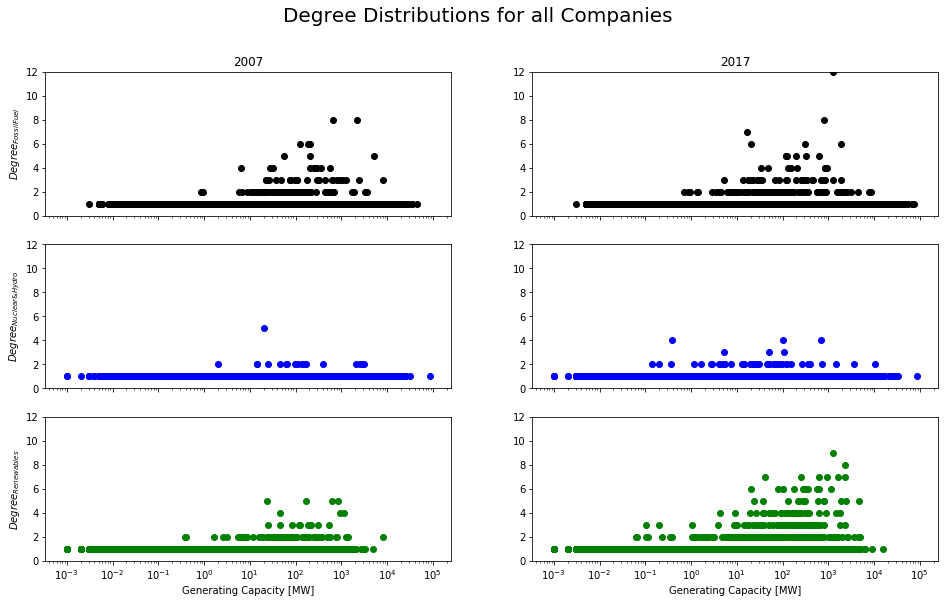

In [84]:
f, axarr = plt.subplots(nrows=3,ncols=2,sharex=True, figsize=(16,9))

for r in axarr:
    for c in r:
        #c.set_yscale('log')
        c.set_xscale('log')
        c.set_ylim(0,12)

#axarr[0].set_yscale('log')
#axarr[1].set_yscale('log')
#axarr[2].set_yscale('log')
#axarr[0].set_xscale('log')
#axarr[1].set_xscale('log')
#axarr[2].set_xscale('log')
#axarr[0].set_xtickabels(years)


"""
axarr[0].set_xlim(2006.3,2018)
axarr[0].set_xticks(years)
#axarr[0].set_xtickabels(years)

axarr[0].set_ylim(0,100)
axarr[1].set_ylim(0,100)
axarr[2].set_ylim(0,100)

axarr[0].arrow(2008, 100.0, .9, 0, head_width=5, head_length=0.1, fc='k', ec='k', width=2)
axarr[1].arrow(2008, 100.0, .9, 0, head_width=5, head_length=0.1, fc='k', ec='k', width=2)
axarr[2].arrow(2008, 100.0, .9, 0, head_width=5, head_length=0.1, fc='k', ec='k', width=2)

axarr[0].arrow(2006.8, 50.0, 0, -40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)
axarr[1].arrow(2006.8, 50.0, 0, -40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)
axarr[2].arrow(2006.8, 50.0, 0, -40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)

axarr[0].arrow(2006.8, 50.0, 0, 40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)
axarr[1].arrow(2006.8, 50.0, 0, 40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)
axarr[2].arrow(2006.8, 50.0, 0, 40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)

axarr[0].text(2006.7, 80,'small\ncompanies', ha='right', rotation=90)
axarr[1].text(2006.7, 80,'small\ncompanies', ha='right', rotation=90)
axarr[2].text(2006.7, 80,'small\ncompanies', ha='right', rotation=90)

axarr[0].text(2006.4, 30,'large\ncompanies', ha='left', rotation=90)
axarr[1].text(2006.4, 30,'large\ncompanies', ha='left', rotation=90)
axarr[2].text(2006.4, 30,'large\ncompanies', ha='left', rotation=90)

axarr[0].text(2007.95, 105,'d=1')
axarr[1].text(2007.95, 105,'d=1')
axarr[2].text(2007.95, 105,'d=1')

axarr[0].text(2008.95, 105,'d=5')
axarr[1].text(2008.95, 105,'d=5')
axarr[2].text(2008.95, 105,'d=5')

axarr[0].set_ylabel('%$N_{Companies, Fossil Fuel}$')
axarr[1].set_ylabel('%$N_{Companies, Nuclear & Hydro}$')
axarr[2].set_ylabel('%$N_{Companies, Renewables}$')

"""

cols_dict={0:'black',1:'blue',2:'green'}

degree_means = {'data_ff':{},'data_b':{},'data_g':{}}
degree_std = {'data_ff':{},'data_b':{},'data_g':{}}


ii=0
jj=-1
for y in [2007,2017]:
    jj+=1
    ii=0
    for data_str in ['data_ff','data_b','data_g']:
        df = data[y][data_str]
        df = df.drop(df[df['sum']<0.001].index)

        axarr[ii,jj].scatter(df['sum'],df.degree, color=cols_dict[ii])
    
        ii+=1

    


axarr[0,0].set_ylabel('$Degree_{Fossil Fuel}$')
axarr[1,0].set_ylabel('$Degree_{Nuclear & Hydro}$')
axarr[2,0].set_ylabel('$Degree_{Renewables}$')

axarr[0,0].set_title('2007')
axarr[0,1].set_title('2017')

axarr[2,0].set_xlabel('Generating Capacity [MW]')
axarr[2,1].set_xlabel('Generating Capacity [MW]')

f.suptitle('Degree Distributions for all Companies', fontsize=20)
#f.legend((black_line,gray_patch), ('$Degree_{Mean}$','$Degree_{Std}}$'), loc='center', bbox_to_anchor=(0.5,0.92), ncol=2)
f.savefig('out_dd_simple.png')



plt.show()

#print np.mean(degree_means)


2007
data_ff
1.01675492664
data_b
1.00446049278
data_g
1.01623096811
2008
data_ff
1.01593860685
data_b
1.00444186945
data_g
1.018230563
2009
data_ff
1.01589512495
data_b
1.00443377055
data_g
1.01923076923
2010
data_ff
1.01546350453
data_b
1.00482509047
data_g
1.02263558942
2011
data_ff
1.01619369546
data_b
1.00450901804
data_g
1.02489495798
2012
data_ff
1.0163129673
data_b
1.00496354894
data_g
1.02945912665
2013
data_ff
1.0161673094
data_b
1.00515320334
data_g
1.03406197876
2014
data_ff
1.01695159778
data_b
1.00552770279
data_g
1.0363831367
2015
data_ff
1.01715085754
data_b
1.00532687651
data_g
1.03956555469
2016
data_ff
1.0168715847
data_b
1.00639311868
data_g
1.04109589041
2017
data_ff
1.01637901861
data_b
1.00622637314
data_g
1.04241412877
{'data_ff': {2016: 1.0168715846994536, 2017: 1.0163790186125212, 2007: 1.0167549266429377, 2008: 1.0159386068476977, 2009: 1.0158951249487915, 2010: 1.0154635045268809, 2011: 1.016193695464193, 2012: 1.0163129672985425, 2013: 1.0161673094037378, 2

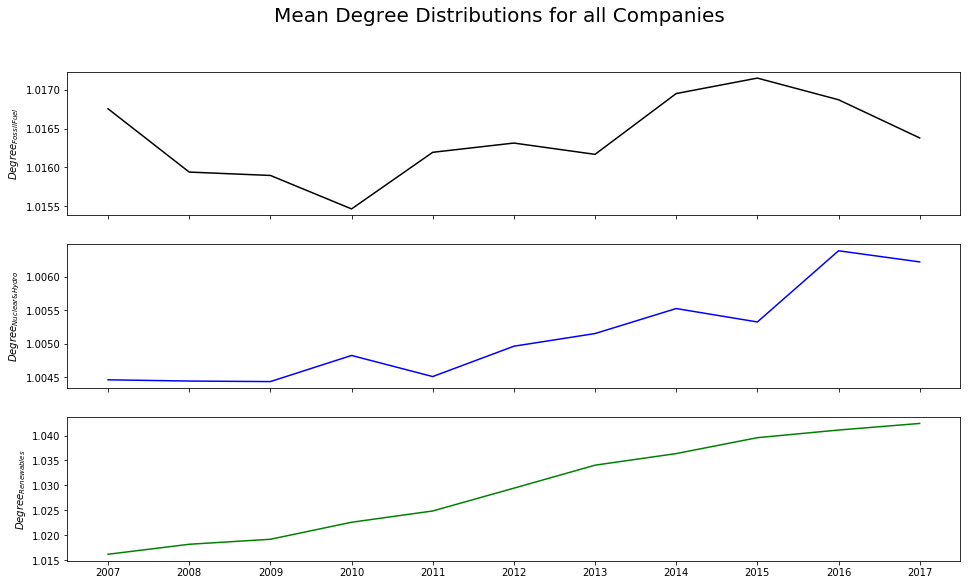

In [82]:
f, axarr = plt.subplots(3,sharex=True, figsize=(16,9))
axarr[0].set_xticks(years)
#axarr[0].set_xtickabels(years)


"""
axarr[0].set_xlim(2006.3,2018)
axarr[0].set_xticks(years)
#axarr[0].set_xtickabels(years)

axarr[0].set_ylim(0,100)
axarr[1].set_ylim(0,100)
axarr[2].set_ylim(0,100)

axarr[0].arrow(2008, 100.0, .9, 0, head_width=5, head_length=0.1, fc='k', ec='k', width=2)
axarr[1].arrow(2008, 100.0, .9, 0, head_width=5, head_length=0.1, fc='k', ec='k', width=2)
axarr[2].arrow(2008, 100.0, .9, 0, head_width=5, head_length=0.1, fc='k', ec='k', width=2)

axarr[0].arrow(2006.8, 50.0, 0, -40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)
axarr[1].arrow(2006.8, 50.0, 0, -40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)
axarr[2].arrow(2006.8, 50.0, 0, -40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)

axarr[0].arrow(2006.8, 50.0, 0, 40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)
axarr[1].arrow(2006.8, 50.0, 0, 40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)
axarr[2].arrow(2006.8, 50.0, 0, 40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)

axarr[0].text(2006.7, 80,'small\ncompanies', ha='right', rotation=90)
axarr[1].text(2006.7, 80,'small\ncompanies', ha='right', rotation=90)
axarr[2].text(2006.7, 80,'small\ncompanies', ha='right', rotation=90)

axarr[0].text(2006.4, 30,'large\ncompanies', ha='left', rotation=90)
axarr[1].text(2006.4, 30,'large\ncompanies', ha='left', rotation=90)
axarr[2].text(2006.4, 30,'large\ncompanies', ha='left', rotation=90)

axarr[0].text(2007.95, 105,'d=1')
axarr[1].text(2007.95, 105,'d=1')
axarr[2].text(2007.95, 105,'d=1')

axarr[0].text(2008.95, 105,'d=5')
axarr[1].text(2008.95, 105,'d=5')
axarr[2].text(2008.95, 105,'d=5')

axarr[0].set_ylabel('%$N_{Companies, Fossil Fuel}$')
axarr[1].set_ylabel('%$N_{Companies, Nuclear & Hydro}$')
axarr[2].set_ylabel('%$N_{Companies, Renewables}$')

"""

degree_means = {'data_ff':{},'data_b':{},'data_g':{}}
degree_std = {'data_ff':{},'data_b':{},'data_g':{}}

for y in years:
    print y
    ii=0
    for data_str in ['data_ff','data_b','data_g']:
        print data_str
        df = data[y][data_str]
        #print df.degree
        df = df.drop(df[df.degree<0.0001].index)
        #print df.degree
        print df.degree.mean()
        degree_means[data_str][y]=df.degree.mean()#-(1/len(df.degree))
        degree_std[data_str][y]=df.degree.std()
    
        #df = df.drop(df[df.degree<1.0].index)
        #print df['sum'].sum(axis=0)
        #verts = np.arange(len(df))/float(len(df))*100
        #degrees = ((df.degree.rolling(50, min_periods=1).mean())-1.0)/4.0#-df.degree.min())*500
        #print 'max degrees', degrees.max()*5
        #print degrees
        #degrees_std = degrees+(df.degree.rolling(50, min_periods=1).std())/4.0#*500
        #print 'max std', degrees_std.max()*5
        #degrees = degrees+y
        #degrees_std = degrees_std+y
        #print degrees.values
    
        #print verts
        #print degrees
        #print degrees_std
        #axarr[ii].plot(degrees.values,verts, color=cols_dict[ii])
        #axarr[ii].fill_betweenx(verts,y,degrees_std.values, alpha=0.3, color=cols_dict[ii])
        #axarr[0].plot(degrees_std.values,verts)
        #vert = np.arange(len(df))/df['sum'].sum(axis)
    

        #axarr[ii].axvline(x=y, color='k', linestyle='--')
    
        #print data[y]['data']
    
        #axarr[2].scatter(df_test['degree'],df_test['cumsum'])
        #axarr[2].violinplot(df_test['degree'],positions = [1.0], widths=50, points=10000)
        #axarr[2].set_ylabel('ALL_Cumulative_Sum')
        #f.savefig(os.path.join('output',path['ID'],'_ndwi_stats.png'))
        
        #ii+=1
#f.suptitle('Degree Distributions for all Companies', fontsize=20)

print degree_means
print degree_std

cols_dict={0:'black',1:'blue',2:'green'}


ii=0
for data_str in ['data_ff','data_b','data_g']:
    series_m = np.array([degree_means[data_str][y] for y in years])
    series_std = np.array([degree_std[data_str][y] for y in years])
    axarr[ii].plot(np.array(years),series_m, color=cols_dict[ii])
    #axarr[ii].fill_between(years,(series_m+series_std),1.0, alpha=0.3, color=cols_dict[ii])
    ii+=1


gray_patch = mpatches.Patch(color='gray', label='The red data')
black_line = mlines.Line2D([0],[0],color='black')


axarr[0].set_ylabel('$Degree_{Fossil Fuel}$')
axarr[1].set_ylabel('$Degree_{Nuclear & Hydro}$')
axarr[2].set_ylabel('$Degree_{Renewables}$')

f.suptitle('Mean Degree Distributions for all Companies', fontsize=20)
#f.legend((black_line,gray_patch), ('$Degree_{Mean}$','$Degree_{Std}}$'), loc='center', bbox_to_anchor=(0.5,0.92), ncol=2)
f.savefig('out_dd_tseries.png')




plt.show()

#print np.mean(degree_means)


2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


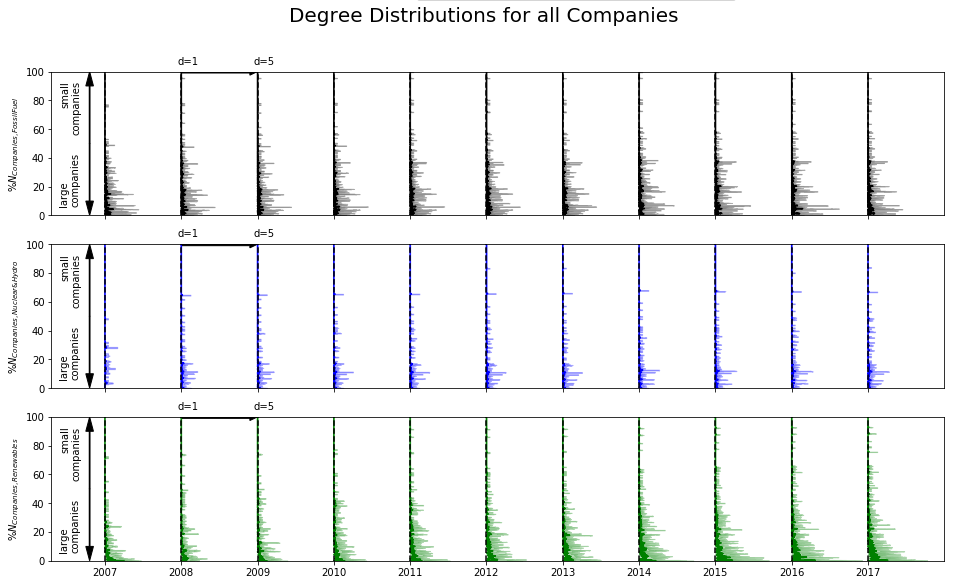

0.376463415038


In [12]:
""" lets plot them degrees """




f, axarr = plt.subplots(3,sharex=True, figsize=(16,9))
axarr[0].set_xlim(2006.3,2018)
axarr[0].set_xticks(years)
#axarr[0].set_xtickabels(years)

axarr[0].set_ylim(0,100)
axarr[1].set_ylim(0,100)
axarr[2].set_ylim(0,100)

axarr[0].arrow(2008, 100.0, .9, 0, head_width=5, head_length=0.1, fc='k', ec='k', width=2)
axarr[1].arrow(2008, 100.0, .9, 0, head_width=5, head_length=0.1, fc='k', ec='k', width=2)
axarr[2].arrow(2008, 100.0, .9, 0, head_width=5, head_length=0.1, fc='k', ec='k', width=2)

axarr[0].arrow(2006.8, 50.0, 0, -40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)
axarr[1].arrow(2006.8, 50.0, 0, -40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)
axarr[2].arrow(2006.8, 50.0, 0, -40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)

axarr[0].arrow(2006.8, 50.0, 0, 40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)
axarr[1].arrow(2006.8, 50.0, 0, 40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)
axarr[2].arrow(2006.8, 50.0, 0, 40, head_width=.1, head_length=10, fc='k', ec='k', width=.01)

axarr[0].text(2006.7, 80,'small\ncompanies', ha='right', rotation=90)
axarr[1].text(2006.7, 80,'small\ncompanies', ha='right', rotation=90)
axarr[2].text(2006.7, 80,'small\ncompanies', ha='right', rotation=90)

axarr[0].text(2006.4, 30,'large\ncompanies', ha='left', rotation=90)
axarr[1].text(2006.4, 30,'large\ncompanies', ha='left', rotation=90)
axarr[2].text(2006.4, 30,'large\ncompanies', ha='left', rotation=90)

axarr[0].text(2007.95, 105,'d=1')
axarr[1].text(2007.95, 105,'d=1')
axarr[2].text(2007.95, 105,'d=1')

axarr[0].text(2008.95, 105,'d=5')
axarr[1].text(2008.95, 105,'d=5')
axarr[2].text(2008.95, 105,'d=5')

cols_dict={0:'black',1:'blue',2:'green'}

axarr[0].set_ylabel('%$N_{Companies, Fossil Fuel}$')
axarr[1].set_ylabel('%$N_{Companies, Nuclear & Hydro}$')
axarr[2].set_ylabel('%$N_{Companies, Renewables}$')

degree_means = []

for y in years:
    print y
    ii=0
    for data_str in ['data_ff','data_b','data_g']:
        df = data[y][data_str]
        degree_means.append(df.degree.mean())
    
        df = df.drop(df[df.degree<1.0].index)
        #print df['sum'].sum(axis=0)
        verts = np.arange(len(df))/float(len(df))*100
        degrees = ((df.degree.rolling(50, min_periods=1).mean())-1.0)/4.0#-df.degree.min())*500
        #print 'max degrees', degrees.max()*5
        #print degrees
        degrees_std = degrees+(df.degree.rolling(50, min_periods=1).std())/4.0#*500
        #print 'max std', degrees_std.max()*5
        degrees = degrees+y
        degrees_std = degrees_std+y
        #print degrees.values
    
        #print verts
        #print degrees
        #print degrees_std
        axarr[ii].plot(degrees.values,verts, color=cols_dict[ii])
        axarr[ii].fill_betweenx(verts,y,degrees_std.values, alpha=0.3, color=cols_dict[ii])
        #axarr[0].plot(degrees_std.values,verts)
        #vert = np.arange(len(df))/df['sum'].sum(axis)
    

        axarr[ii].axvline(x=y, color='k', linestyle='--')
    
        #print data[y]['data']
    
        #axarr[2].scatter(df_test['degree'],df_test['cumsum'])
        #axarr[2].violinplot(df_test['degree'],positions = [1.0], widths=50, points=10000)
        #axarr[2].set_ylabel('ALL_Cumulative_Sum')
        #f.savefig(os.path.join('output',path['ID'],'_ndwi_stats.png'))
        
        ii+=1
f.suptitle('Degree Distributions for all Companies', fontsize=20)


gray_patch = mpatches.Patch(color='gray', label='The red data')
black_line = mlines.Line2D([0],[0],color='black')

f.legend((black_line,gray_patch), ('$Rolling\_Mean_{window=50}$','$Rolling\_StdDev_{window=50}$'), loc='center', bbox_to_anchor=(0.5,0.92), ncol=2)
f.savefig('out.png')
plt.show()

print np.mean(degree_means)
